# Data Analysis with Python | Project Overview

This is a personal project made after completing the course **Data Analysis with Python** by **freeCodeCamp.org**

<hr></hr>

I have used a <a href="https://www.kaggle.com/datasets/gunapro/electric-vehicle-population-data" target="_blank">database</a> that contains the overview of  information of Electric Vehicles (EVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

I have used Generative AI to generate questions that can be essential topics that stakeholders might want information on, and are possibly helpful to the company.

I have divided the questions in the following ways: one that require data visualizations for stakeholders, other that are statistical based and rest are very specific stakeholder questions.

<hr></hr>

Questions requiring data visualizations for stakeholders:
<li>Top manufacturers of EVs and PHEVs</li>
<li>Distribution of EVs and PHEVs among car manufacturers.</li>
<li>The electric range of vehicles</li>
<li>What are the top 10 cities with the highest number of EVs?</li>
<li>What is the relationship between the base MSRP and the electric range?</li>

Questions requiring statistical analysis:
<li>What is the average electric range of EVs across different makes and models?</li>
<li>How does the base MSRP vary across different makes and models?</li>
<li>What is the standard deviation of the electric range within each EV type?</li>
<li>What is the correlation coefficient between the electric range and the base MSRP?</li>

Specific stakeholder questions:
<li>What is the top model of cars in each District?</li>
<li>What percentage of EVs falls into different model year categories?</li>
<li>For a marketing team: Which city has shown the most growth in EV registrations over the past five years?</li>
<li>For an environmental agency: What vehicles are eligible for Clean Alternative Fuel Vehicle (CAFV) Eligibility?</li>

<hr></hr>

In [70]:
# Importing Libraries for Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [71]:
# Mounting Google Drive to Access CSV File
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# Reading CSV file and setting indexing column to Vehicle Identification Number (VIN)
df=pd.read_csv("/content/drive/MyDrive/Datasets/electric_vehicle_population.csv")
df.rename(columns={'VIN (1-10)':'VIN'},inplace=True)
df.head(3)

,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10


In [73]:
# Data Cleaning and Filtering
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Dropping any duplicates if exist
df.drop_duplicates(inplace=True)

# Filtering Data to remove values where Car Model Year < 2010
df.drop(df[df['Model Year']<2010].index, inplace=True)

# For vehicles with Base MSRP values as 0, change them to NaN
df['Base MSRP'].replace(0, np.nan, inplace=True)

# For vehicles with Electric Range as 0, change them to NaN
df['Electric Range'].replace(0, np.nan, inplace=True)

Questions requiring data visualizations for stakeholders:

* Top manufacturers of EVs and PHEVs
* Distribution of EVs and PHEVs among car manufacturers.
* The electric range of vehicles
* What are the top 10 cities with the highest number of EVs?
* What is the relationship between the base MSRP and the electric range?

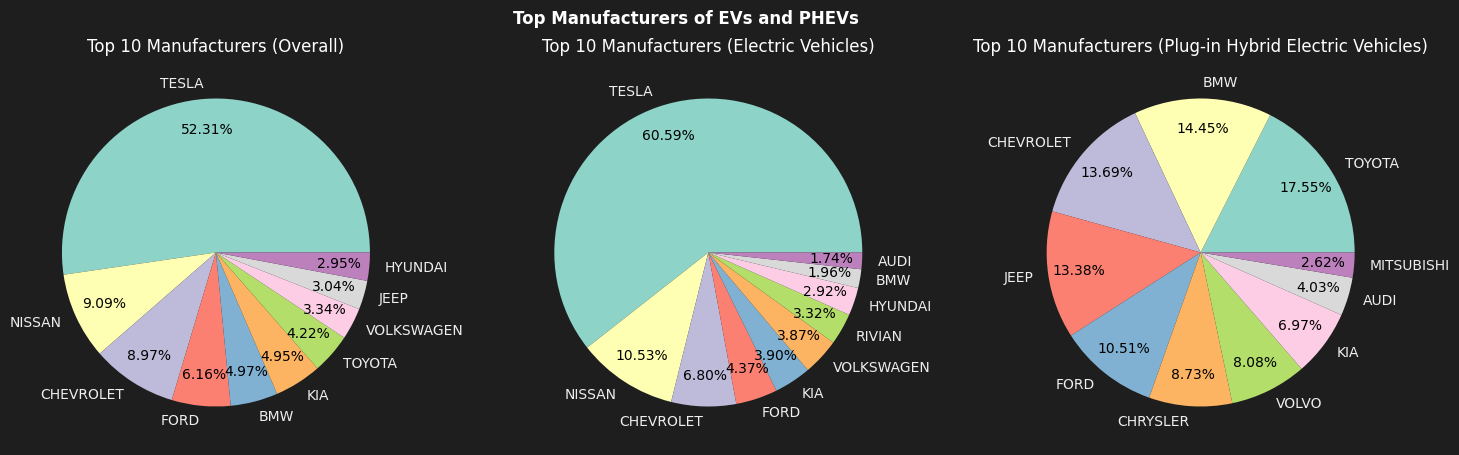

In [74]:
# Creating a dashboard for visualization questions

fig, ax = plt.subplots(1,3,figsize=(18,5))
fig.suptitle("Top Manufacturers of EVs and PHEVs",color='white',fontweight='bold')
fig.set_facecolor("#1E1E1E")

# Top Manufacturers of EVs and PHEVs

ax[0].set_facecolor('white')
manufacturers = df['Make'].value_counts().head(10).sort_values(ascending=False)

_,_,autotxt = ax[0].pie(manufacturers.values, labels=manufacturers.index,autopct='%1.2f%%',pctdistance=0.8,colors=sns.color_palette('Set3'),textprops={'color': '#EEEEEE'})
ax[0].title.set_text("Top 10 Manufacturers (Overall)")
ax[0].title.set_color('white')

for i in autotxt:
  i.set_color('black')

# Distribution of EVs and PHEVs among car manufacturers.

# Top Manufacturers of EVs

ev_df = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
ev_counts = ev_df.groupby('Make')['Electric Vehicle Type'].count().sort_values(ascending=False).head(10)

_,_,autotxt = ax[1].pie(ev_counts.values,labels=ev_counts.index,autopct='%1.2f%%',pctdistance=0.8,textprops={'color': '#EEEEEE'},colors=sns.color_palette('Set3'))
ax[1].title.set_text("Top 10 Manufacturers (Electric Vehicles)")
ax[1].title.set_color('white')

for i in autotxt:
  i.set_color('black')

# Top Manufacturers of PHEVs

phev_df = df[df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']
phev_counts = phev_df.groupby('Make')['Electric Vehicle Type'].count().sort_values(ascending=False).head(10)

_,_,autotxt = ax[2].pie(phev_counts.values,labels=phev_counts.index,autopct='%1.2f%%',pctdistance=0.8,textprops={'color': '#EEEEEE'},colors=sns.color_palette('Set3'))
ax[2].title.set_text("Top 10 Manufacturers (Plug-in Hybrid Electric Vehicles)")
ax[2].title.set_color('white')

for i in autotxt:
  i.set_color('black')

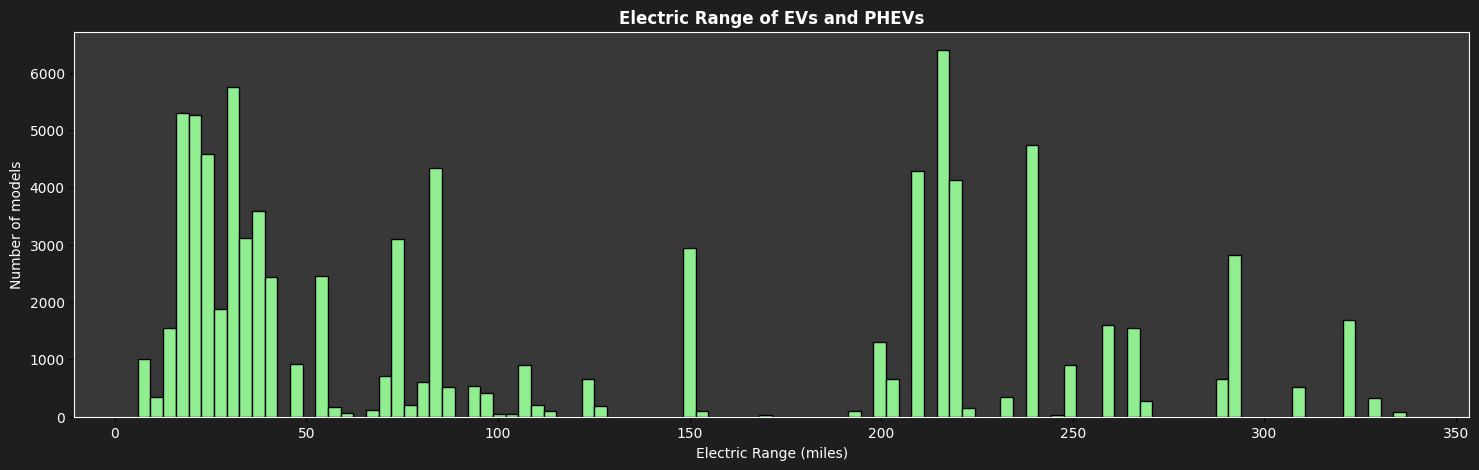

In [75]:
# The electric range of vehicles

plt.figure(figsize=(18,5), facecolor='#1E1E1E')
plt.title(label="Electric Range of EVs and PHEVs", color='white',fontweight='bold')
plt.hist(df['Electric Range'], bins=100, color='lightgreen', edgecolor='black')
plt.gca().set_facecolor('#383838')

plt.xlabel('Electric Range (miles)', color='white')
plt.ylabel('Number of models', color='white')

plt.xticks(color='white')
plt.yticks(color='white')

for spine in plt.gca().spines.values():
    spine.set_edgecolor('white')

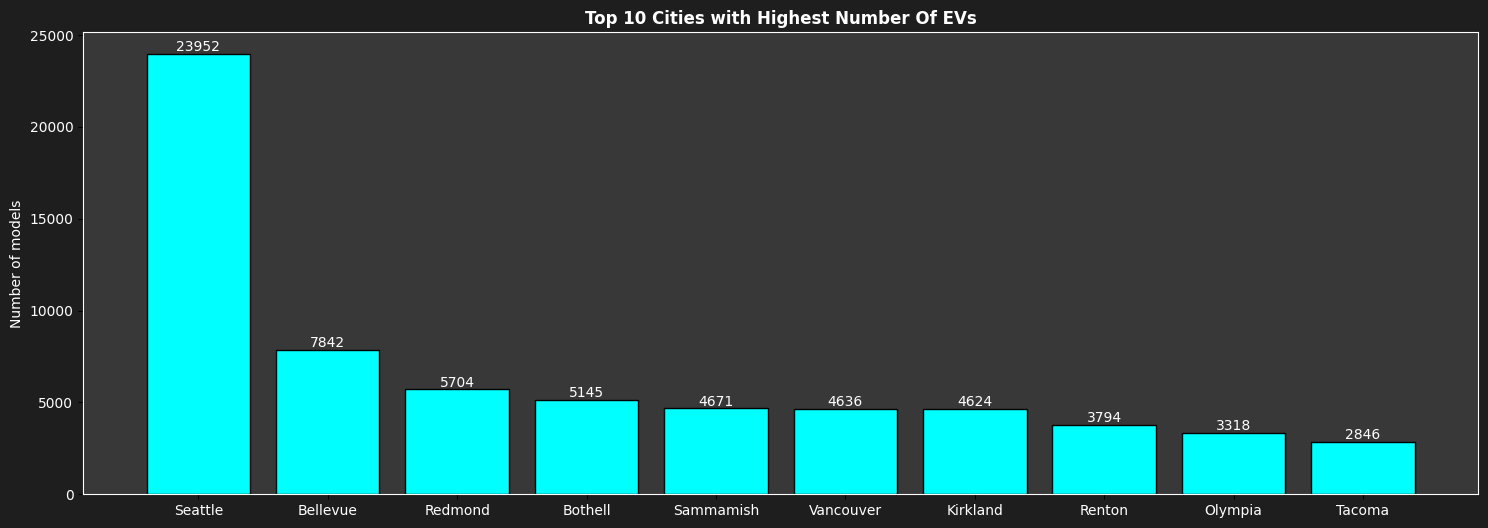

In [76]:
# What are the top 10 cities with the highest number of EVs?

ev_df = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
ev_city = ev_df.groupby('City')['Electric Vehicle Type'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(18,6), facecolor='#1E1E1E')
plt.title(label="Top 10 Cities with Highest Number Of EVs", color='white',fontweight='bold')
a = plt.bar(ev_city.index,ev_city.values,edgecolor='black',color='cyan')
plt.gca().set_facecolor('#383838')

plt.ylabel('Number of models', color='white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.gca().bar_label(a,color='white')

for spine in plt.gca().spines.values():
    spine.set_edgecolor('white')

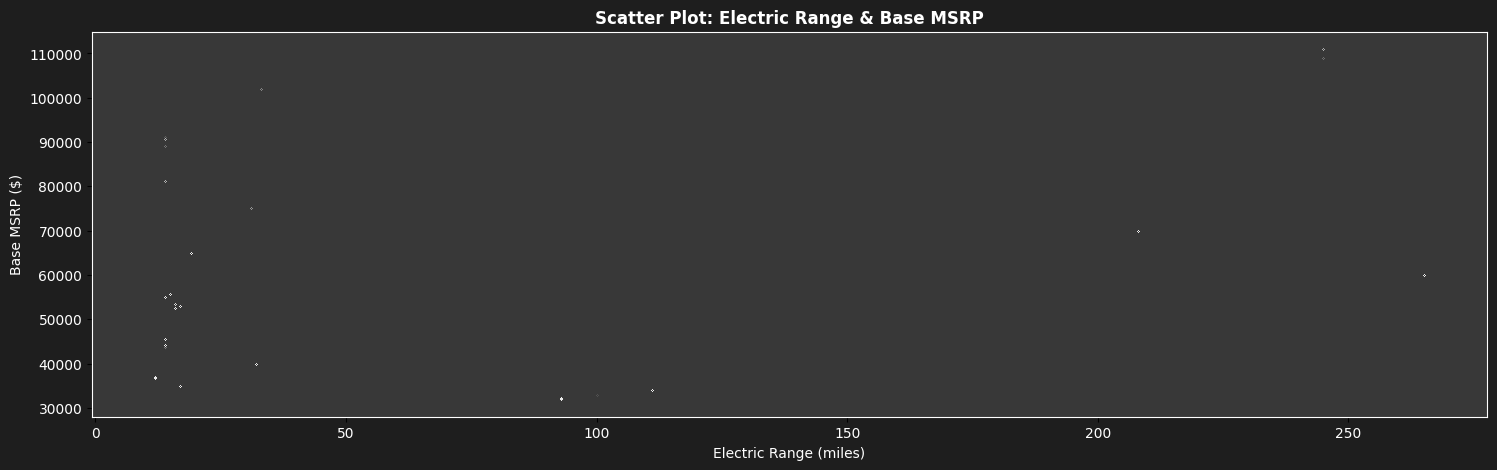

In [77]:
# What is the relationship between the base MSRP and the electric range?

# Removing outlier (model that costs > $120K+)

scatter = df[(df['Base MSRP']<120000.0)]

# Building Scatter Plot

plt.figure(figsize=(18,5), facecolor='#1E1E1E')
plt.title(label="Scatter Plot: Electric Range & Base MSRP", color='white',fontweight='bold')
plt.scatter(scatter['Electric Range'],scatter['Base MSRP'],s=0.001,color='white')
plt.gca().set_facecolor('#383838')
plt.xlabel('Electric Range (miles)', color='white')
plt.ylabel('Base MSRP ($)', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

for spine in plt.gca().spines.values():
    spine.set_edgecolor('white')

Questions requiring statistical analysis:

* What is the average electric range of EVs across different makes and models?
* How does the base MSRP vary across different makes and models?
* What is the standard deviation of the electric range within each EV type?
* What is the correlation coefficient between the electric range and the base MSRP?

In [78]:
# Questions requiring statistical analysis:

# Getting overview of the dataset
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,181418.000000,181421.000000,86691.000000,3292.000000,181023.000000,1.814210e+05,1.814180e+05
mean,98174.037135,2020.585125,120.976261,56737.630620,29.106456,2.214272e+08,5.297574e+10
std,2414.486165,2.981729,99.179939,22665.384578,14.892554,7.527477e+07,1.595038e+09
min,1545.000000,2010.000000,6.000000,31950.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,32.000000,39995.000000,18.000000,1.830752e+08,5.303301e+10
50%,98122.000000,2022.000000,83.000000,59900.000000,33.000000,2.289376e+08,5.303303e+10
75%,98370.000000,2023.000000,215.000000,69900.000000,42.000000,2.561340e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [79]:
# What is the average electric range of EVs across different makes and models?

print("Average range of Electric Range of EVs across manufacturers:\n",
      df.groupby('Make')['Electric Range'].mean().sort_values(ascending=False).dropna().to_string(header=False),sep="")

Average range of Electric Range of EVs across manufacturers:
TESLA                   240.838446
JAGUAR                  234.000000
POLESTAR                233.000000
CHEVROLET               139.114488
VOLKSWAGEN              107.369403
NISSAN                  104.431135
WHEEGO ELECTRIC CARS    100.000000
TH!NK                   100.000000
HYUNDAI                  90.719207
KIA                      85.796662
FIAT                     85.632184
AUDI                     85.168203
PORSCHE                  71.683844
SMART                    62.304833
AZURE DYNAMICS           56.000000
MINI                     47.865497
BMW                      46.700978
HONDA                    46.598311
LEXUS                    36.960199
CADILLAC                 36.516854
MERCEDES-BENZ            33.206972
ALFA ROMEO               33.000000
FISKER                   33.000000
CHRYSLER                 32.208892
DODGE                    32.000000
MITSUBISHI               30.866327
TOYOTA                   29.6

In [80]:
# How does the base MSRP vary across different makes and models? (Comparing minimum, average and maximum)

minBase = df.groupby('Make')['Base MSRP'].min().sort_index().dropna().to_frame()
minBase.rename(columns={'Base MSRP':'Minimum'},inplace=True)

maxBase = df.groupby('Make')['Base MSRP'].max().sort_index().dropna().to_frame()
maxBase.rename(columns={'Base MSRP':'Maximum'},inplace=True)

avgBase = df.groupby('Make')['Base MSRP'].mean().sort_index().dropna().to_frame()
avgBase.rename(columns={'Base MSRP':'Average'},inplace=True)
avgBase = avgBase.round(1)

result=minBase.merge(avgBase,on='Make')
result=result.merge(maxBase,on='Make')
print(result)

                       Minimum   Average   Maximum
Make                                              
BMW                    43700.0   53101.9   91250.0
CADILLAC               75095.0   75095.0   75095.0
CHRYSLER               39995.0   39995.0   39995.0
FISKER                102000.0  102000.0  102000.0
KIA                    31950.0   32269.0   33950.0
MINI                   36800.0   36865.8   36900.0
PORSCHE                81100.0  135551.5  845000.0
SUBARU                 34995.0   34995.0   34995.0
TESLA                  59900.0   69763.4  110950.0
VOLVO                  52900.0   56161.1   64950.0
WHEEGO ELECTRIC CARS   32995.0   32995.0   32995.0


In [81]:
# What is the standard deviation of the electric range within each EV type?

print("Standard deviation of Electric Range within each EV type:\n",
      df.groupby('Electric Vehicle Type')['Electric Range'].std().sort_values(ascending=False).to_string(header=False),sep="")

Standard deviation of Electric Range within each EV type:
Battery Electric Vehicle (BEV)            73.275133
Plug-in Hybrid Electric Vehicle (PHEV)    15.531642


In [82]:
# What is the correlation coefficient between the electric range and the base MSRP?

print("Correlation coefficient between Electric Range and Base MSRP:\n",
      df['Electric Range'].corr(df['Base MSRP']).round(2),sep="")

Correlation coefficient between Electric Range and Base MSRP:
0.4


Specific stakeholder questions:

* What is the top model of cars in each District?
* What percentage of EVs falls into different model year categories?
* For a marketing team: Which city has shown the most growth in EV registrations over the past five years?
* For an environmental agency: What vehicles are eligible for Clean Alternative Fuel Vehicle (CAFV) Eligibility?

In [83]:
# Specific stakeholder questions

# What is the top model of cars in each District?

topModels = df.groupby('Legislative District')['Model'].value_counts().sort_values(ascending=False).groupby(level=0).head(1).sort_index().reset_index()
topModels= topModels.groupby('Model')['Legislative District'].apply(list)

print("The following are the top models in each district:")
for i in topModels.index:
  print(i,": ",topModels[i],sep="")

The following are the top models in each district:
LEAF: [24.0, 40.0]
MODEL 3: [2.0, 8.0, 9.0, 15.0, 16.0, 19.0, 20.0, 25.0, 28.0, 29.0, 33.0, 35.0, 43.0, 49.0]
MODEL Y: [1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 10.0, 11.0, 12.0, 13.0, 14.0, 17.0, 18.0, 21.0, 22.0, 23.0, 26.0, 27.0, 30.0, 31.0, 32.0, 34.0, 36.0, 37.0, 38.0, 39.0, 41.0, 42.0, 44.0, 45.0, 46.0, 47.0, 48.0]


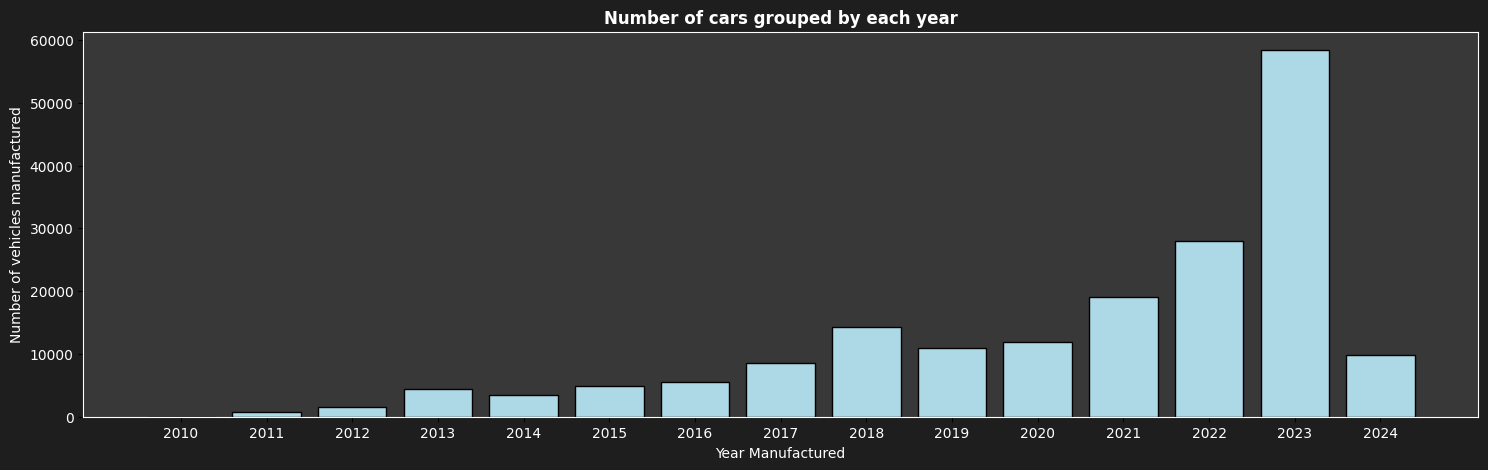

In [84]:
# What percentage of EVs falls into different model year categories?

plt.figure(figsize=(18,5),facecolor='#1E1E1E')
plt.bar(sorted(df['Model Year'].unique()),df['Model Year'].value_counts().sort_index(),color='lightblue',edgecolor='black')
plt.yticks(color='white')
plt.xlabel("Year Manufactured", color='white')
plt.xticks(df['Model Year'].unique(), color='white')
plt.ylabel("Number of vehicles manufactured", color='white')
plt.title("Number of cars grouped by each year", color='white', fontweight='bold')
plt.gca().set_facecolor('#383838')

for spine in plt.gca().spines.values():
    spine.set_edgecolor('white')

In [85]:
# For a marketing team: Which city has shown the most growth in EV registrations over the past five years?

# Sorting data by year of model and taking data of last 5 years

sort = df.sort_values(by='Model Year',ascending=False).reset_index()
sort = sort[sort['Model Year']>=(2024-5)]

# Select top 5 cities with most EV registrations

topCities = sort.groupby('City')['Model Year'].count().sort_values(ascending=False).head(5)
print("The following city have shown the most growth in EV registrations:\n",topCities.to_string(header=False),sep="")

The following city have shown the most growth in EV registrations:
Seattle      22462
Bellevue      7150
Redmond       5239
Bothell       4964
Vancouver     4712


In [86]:
# For an environmental agency: What vehicles are eligible for Clean Alternative Fuel Vehicle (CAFV) Eligibility?

# We will only consider the vehicles that have researched battery ranges

eligible = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'][df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']!="Eligibility unknown as battery range has not been researched"]
total = eligible.count()

eligible = eligible.value_counts()[0]

print("Out of {} vehicles with researched battery ranges, {} are eligible under the Clean Alternative Fuel Vehicle (CAFV) Eligibility criteria.".format(total,eligible))
print("Percentage of eligible vehicles:", round((eligible/total)*100,2))

Out of 86691 vehicles with researched battery ranges, 66779 are eligible under the Clean Alternative Fuel Vehicle (CAFV) Eligibility criteria.
Percentage of eligible vehicles: 77.03
